<a href="https://colab.research.google.com/github/Sapna0304/Graduation_Admission/blob/Sapna0304/Admission_Graduate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data1=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [47]:
data1.shape

(500, 9)

In [48]:
(data1.head()).T

,0,1,2,3,4
Serial No.,1.00,2.00,3.00,4.00,5.00
GRE Score,337.00,324.00,316.00,322.00,314.00
TOEFL Score,118.00,107.00,104.00,110.00,103.00
University Rating,4.00,4.00,3.00,3.00,2.00
SOP,4.50,4.00,3.00,3.50,2.00
LOR,4.50,4.50,3.50,2.50,3.00
CGPA,9.65,8.87,8.00,8.67,8.21
Research,1.00,1.00,1.00,1.00,0.00
Chance of Admit,0.92,0.76,0.72,0.80,0.65


In [49]:
missing_percentage = (data1.isnull().sum() / len(data1)) * 100 #Percentage of missing values
print(missing_percentage)


Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64


In [50]:
data1[data1.duplicated()]  #checking duplicate values


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [51]:
data1.describe(exclude = ['object'])

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [53]:
data1=data1.drop("Serial No.",axis=1) #dropping column
data1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


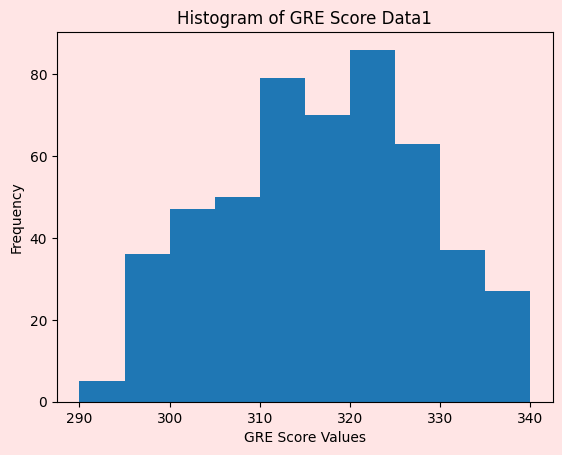

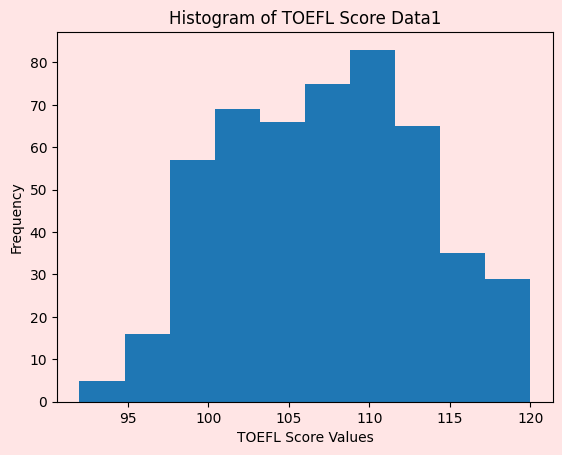

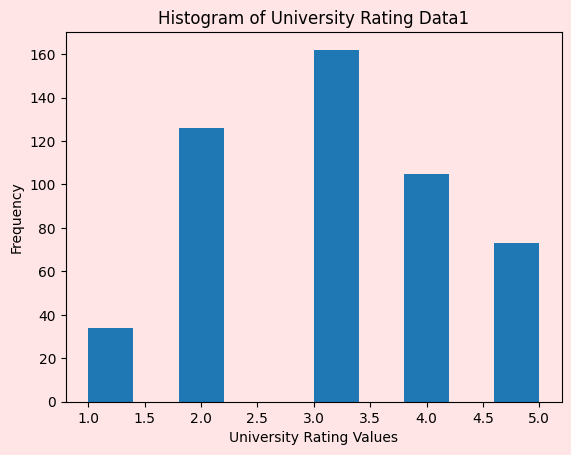

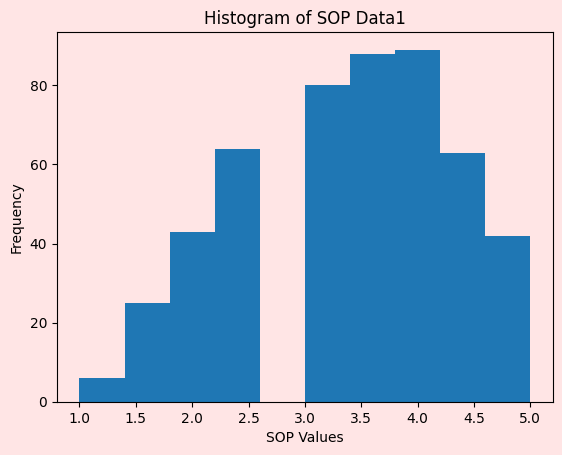

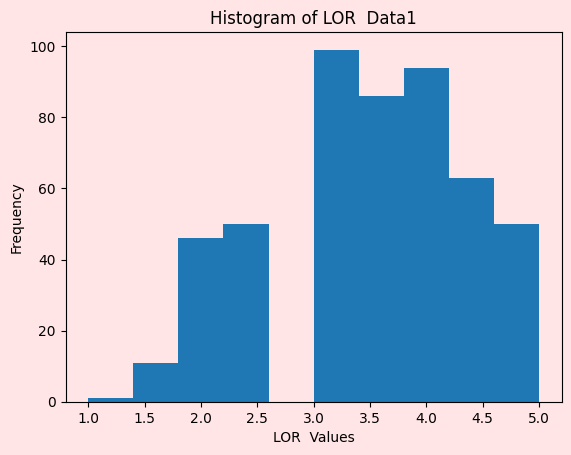

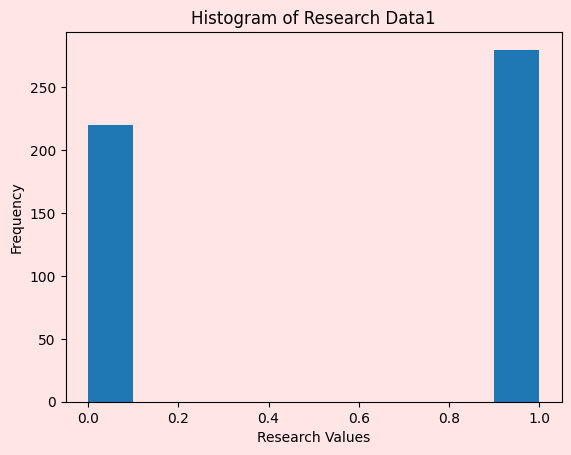

In [54]:
def visualize_column_data(data1):
  nunique = data1.nunique()
  data1 = data1[[col for col in data1 if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values

    # Iterate through each column in the dataset
  for column in data1.columns:
        # Check if the column contains numerical data
        if data1[column].dtype in [int, float]:
            # Plotting a histogram
            plt.hist(data1[column], bins=10)  # Adjust the number of bins as needed
            plt.xlabel(column + ' Values')
            plt.ylabel('Frequency')
            plt.title('Histogram of ' + column + ' Data1')
            plt.show()


        else:
            print(f"Column '{column}' does not contain numerical data and will be skipped.")

# Call the function to visualize all the columns in the dataset
visualize_column_data(data1)


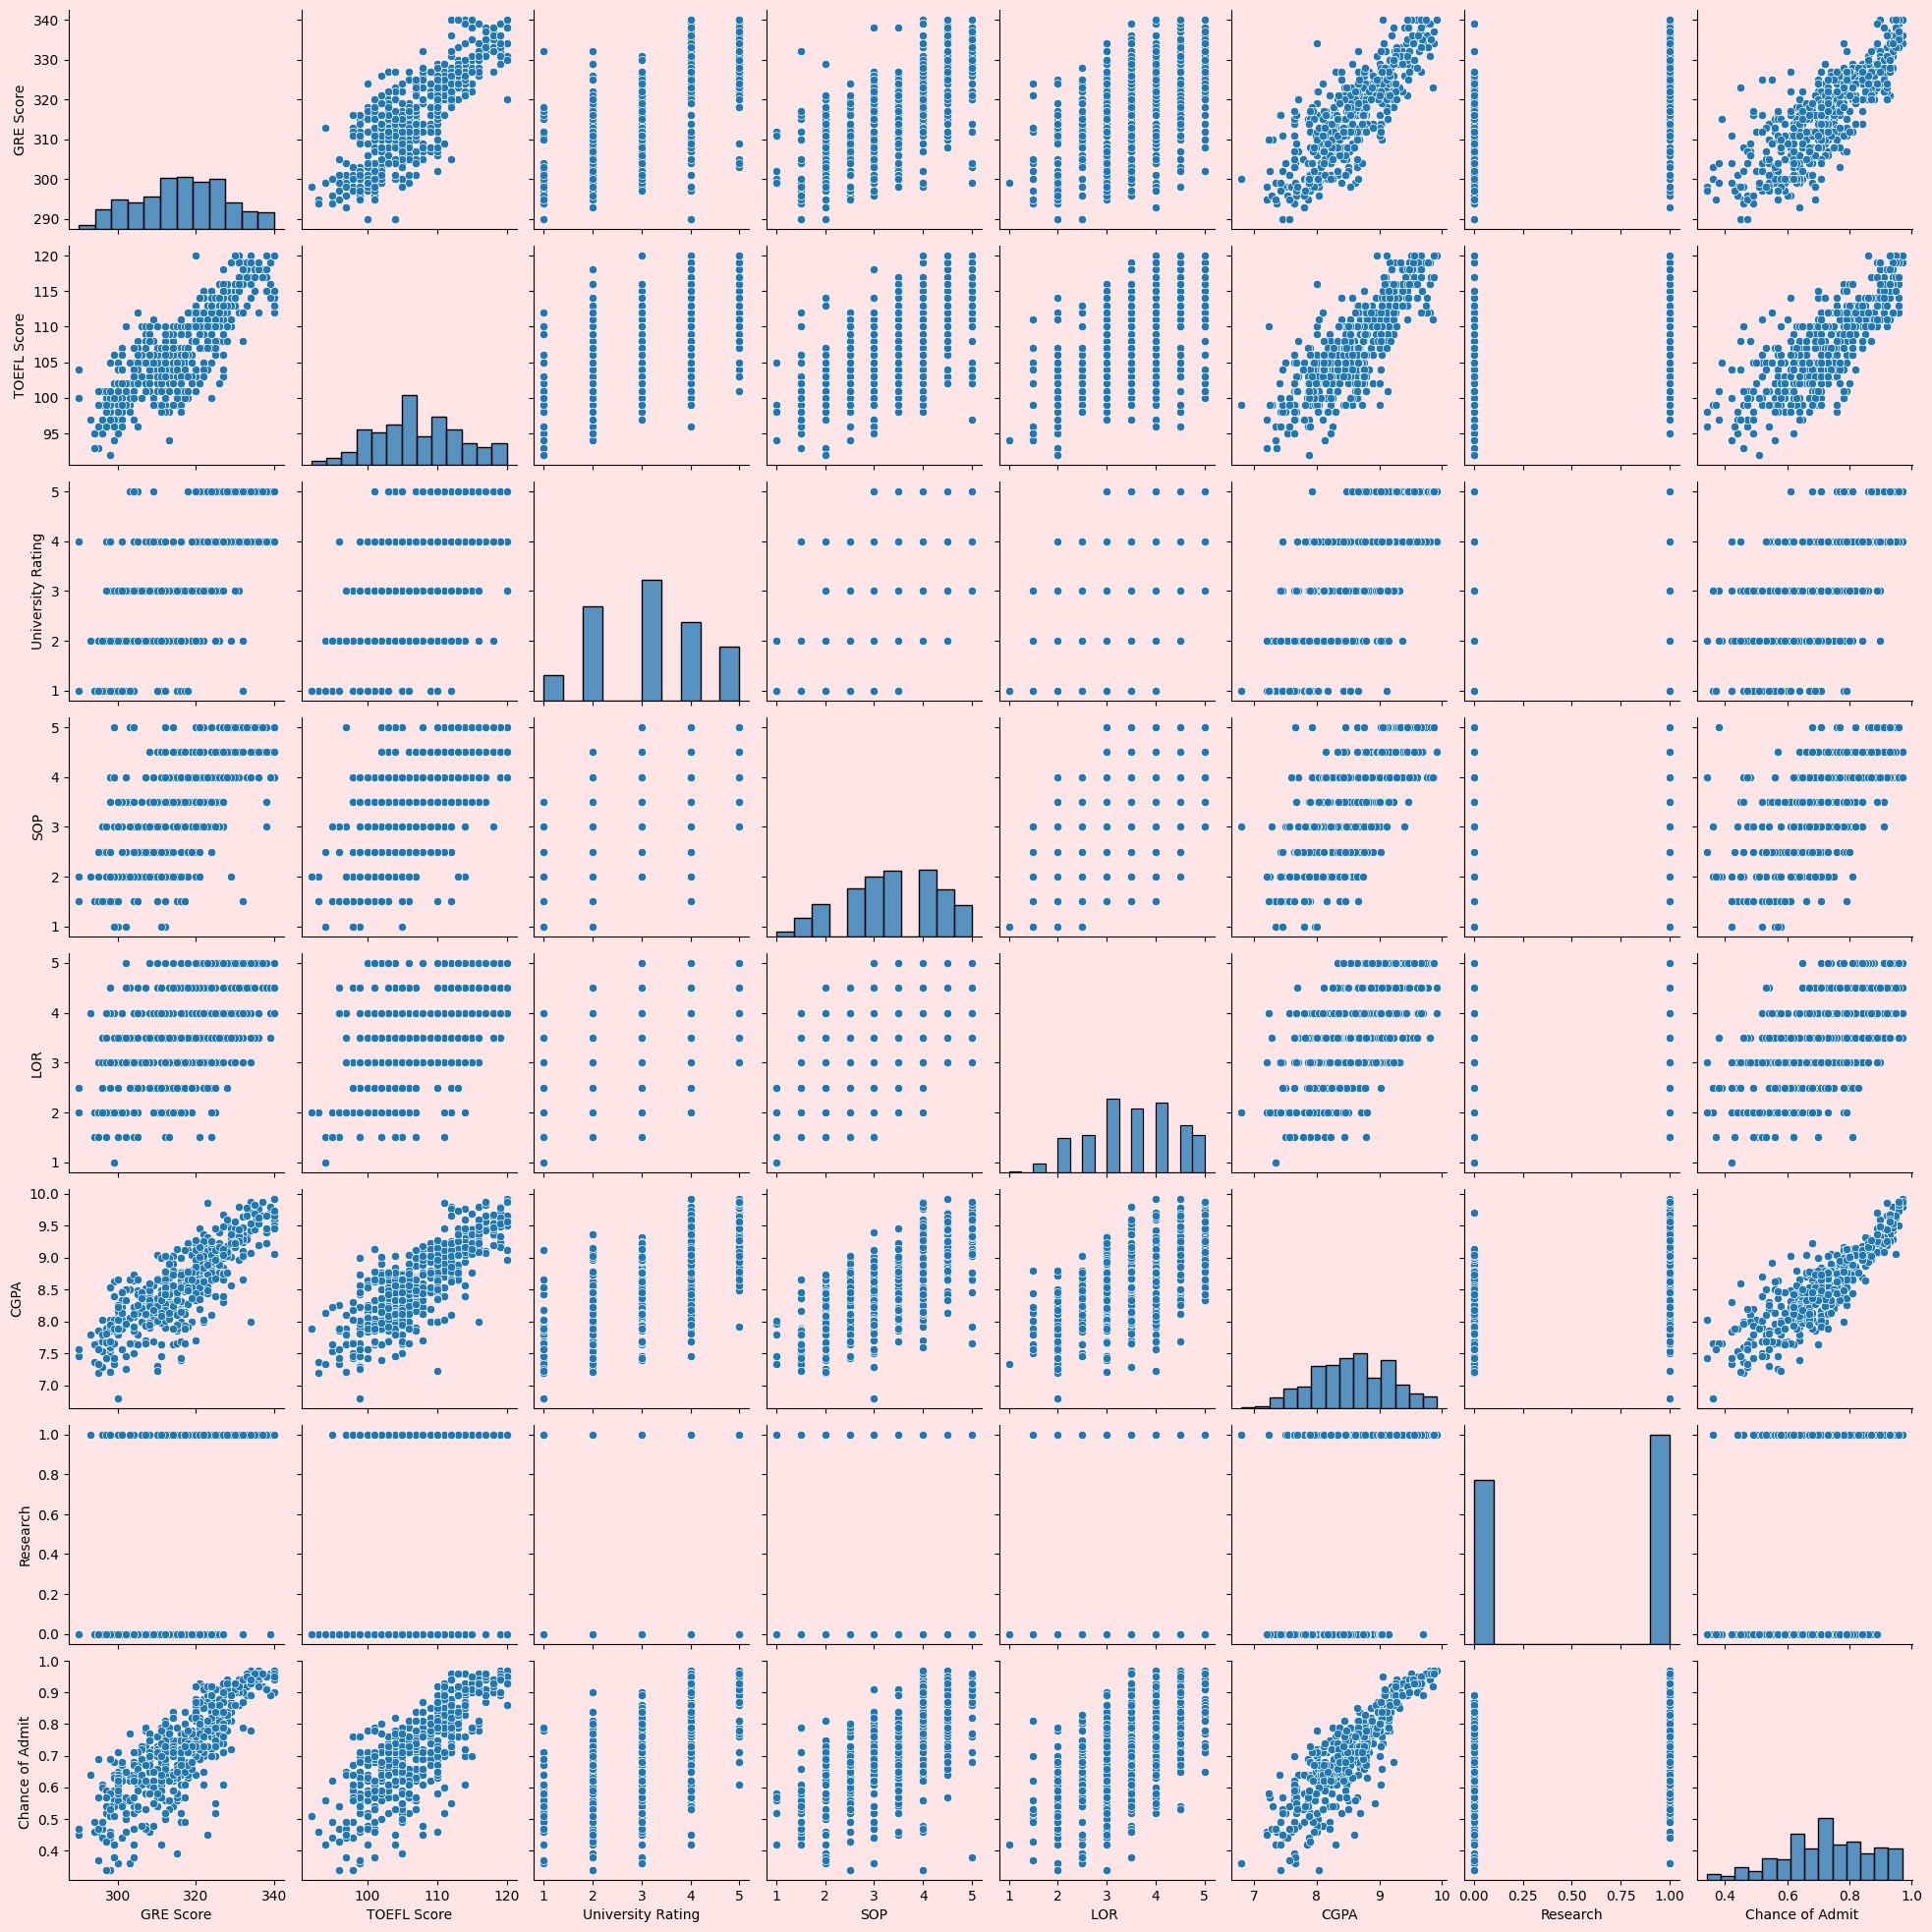

In [55]:
sns.pairplot(data1)


Inferences from the above pairplot:

GRE score TOEFL score and CGPA all are linearly related to each other
Research Students tend to Score higher by all means

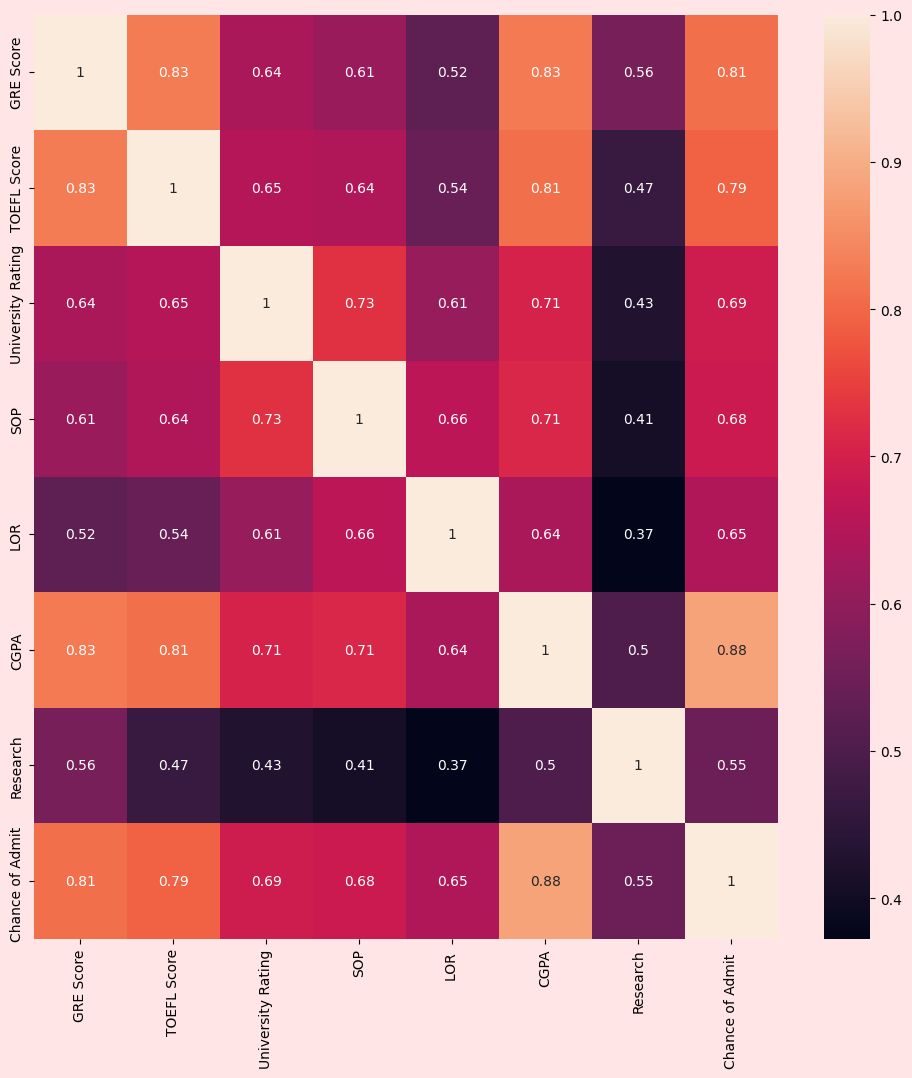

In [56]:
corr_matrix= data1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

Inference from the above heatmap!!
Here we can see that the chance of admit is highly correlated with CGPA, GRE and TOEFEL scores are also correlated.

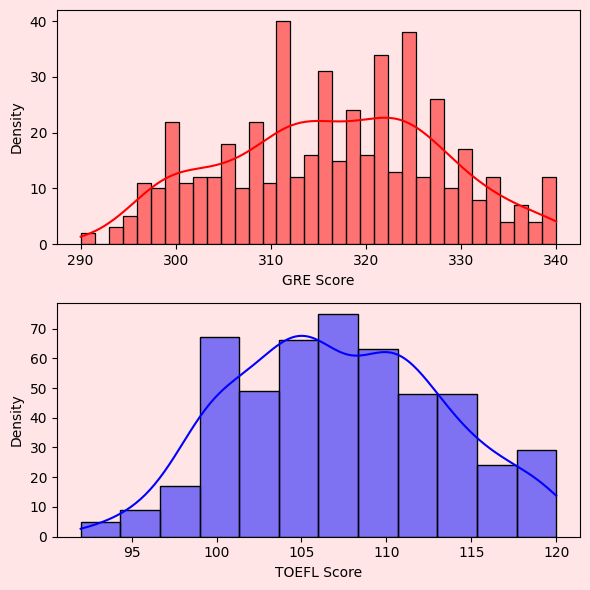

In [57]:
plt.rcParams['axes.facecolor'] = "#ffe5e5"
plt.rcParams['figure.facecolor'] = "#ffe5e5"

sns.set_color_codes("muted")

fig, axs = plt.subplots(2, 1, figsize=(6, 6))

sns.histplot(data=data1, x='GRE Score', bins=34, color='Red', kde=True, ax=axs[0])
sns.histplot(data=data1, x='TOEFL Score', bins=12, color='Blue', kde=True, ax=axs[1])

axs[0].set_ylabel('Density')
axs[1].set_ylabel('Density')
axs[0].set_xlabel('GRE Score')
axs[1].set_xlabel('TOEFL Score')

plt.tight_layout()
plt.show()


From the above 2 graphs its clear that people tend to score above 310 in GRE and above 100 in TOEFL

###Creating a label encoded column based on Chance of Admit
Because we are trying to predict a label for admission (Y/N).

In [58]:
data1["Admit"] = np.where(data1['Chance of Admit '] <= 0.5, 0, 1)
data1["Admit"].value_counts()


1    461
0     39
Name: Admit, dtype: int64

#### Detecting Outliers

In [59]:
data1.describe()
Q1=data1.quantile(0.25)
Q3=data1.quantile(0.75)
IQR=Q3-Q1
IQR
((data1<(Q1-1.5*IQR)) | (data1>(Q3+1.5*IQR))).any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                   True
CGPA                 False
Research             False
Chance of Admit       True
Admit                 True
dtype: bool

In [60]:
def find_outliers_IQR(data1):

   q1=data1.quantile(0.25)

   q3=data1.quantile(0.75)

   IQR=q3-q1

   outliers = data1[((data1<(q1-1.5*IQR)) | (data1>(q3+1.5*IQR)))]

   return outliers

In [61]:
outliers = find_outliers_IQR(data1['LOR '])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 1
max outlier value: 1.0
min outlier value: 1.0


347    1.0
Name: LOR , dtype: float64

In [62]:
def detect_outliers(data1, features, threshold=3):
    """
    Detects outliers in the specified features of a DataFrame using the z-score method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        features (list): The list of feature names to check for outliers.
        threshold (float): The threshold value for z-scores. Values above this threshold are considered outliers.
                           Default is 3.

    Returns:
        list: A list of indices corresponding to the observations containing outliers in the specified features.
    """
    outlier_indices = []

    for feature in features:
        # Calculate the z-score for the feature
        z_scores = np.abs((data1[feature] - data1[feature].mean()) / data1[feature].std())

        # Find the indices of outliers based on the threshold
        feature_outliers = np.where(z_scores > threshold)[0]

        # Add the outliers to the list of indices
        outlier_indices.extend(feature_outliers)

    # Remove duplicate indices and return the final list
    outlier_indices = list(set(outlier_indices))
    return outlier_indices


In [63]:
outliers_to_drop = detect_outliers(data1, ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'], threshold=3)


In [64]:
data1.loc[outliers_to_drop] # Show the outliers rows


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit


### MODEL BUILDING

In [66]:
from sklearn.model_selection import train_test_split
X=data1.drop(['Chance of Admit ', 'Admit'],axis=1)
y=data1['Admit']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
# Create pipelines using make_pipeline
pipeline_lr = make_pipeline(StandardScaler(), LogisticRegression())
pipeline_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipeline_rf = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipeline_xgb = make_pipeline(StandardScaler(), XGBClassifier())

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LogisticRegression", 1: "DecisionTree", 2: "RandomForest", 3: "KNeighbors", 4: "XGBClassifier"}


In [69]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [70]:
#Getting CV scores
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LogisticRegression: 0.947500 
DecisionTree: 0.905000 
RandomForest: 0.935000 
KNeighbors: 0.920000 
XGBClassifier: 0.932500 


In [71]:
y_pred = pipeline_lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 1  5]
 [ 1 93]]


In [72]:
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.95      0.99      0.97        94

    accuracy                           0.94       100
   macro avg       0.72      0.58      0.61       100
weighted avg       0.92      0.94      0.93       100



###Feature importance

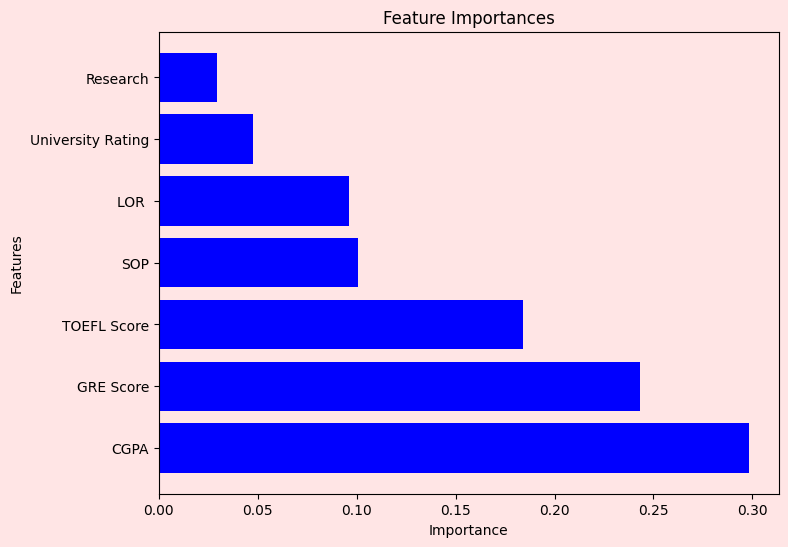

In [77]:
classifier = RandomForestClassifier()
classifier.fit(X, y)

importance = classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame to store the feature importances
importance_frame = pd.DataFrame({'Features': feature_names, 'Importance': importance})

# Sort the DataFrame by importance in descending order
importance_frame = importance_frame.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_frame['Features'], importance_frame['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


### New Prediction

In [90]:
# Making predictions on some new data

input_data = [{'GREScore': 332,
              'TOEFLScore': 110,
              'UniversityRating': 3,
              'SOP': 4.0,
              'LOR': 4.5,
              'CGPA': 8.6,
              'Research': 1},

              {'GREScore': 312,
              'TOEFLScore': 95,
              'UniversityRating': 3,
              'SOP': 2.0,
              'LOR': 3.5,
              'CGPA': 7.6,
              'Research': 0},

             {'GREScore': 298,
              'TOEFLScore':110,
              'UniversityRating': 4,
              'SOP': 3.0,
              'LOR': 4.5,
              'CGPA': 7.6,
              'Research': 0}]

new_data = [tuple(d.values()) for d in [v for v in [data for data in input_data]]]

In [92]:
# Convert to numpy array
test = np.asarray(new_data)
# Output Labels
labels=["reject", "admit"]
prediction = pipeline_lr.predict(test)
prob_prediction = pipeline_lr.predict_proba(test)

# Get number of test cases used
no_of_test_cases, cols = test.shape
for i in range(no_of_test_cases):
    print("Admission Status of Student with GRE scores = {}, TOEFL score = {}, University Rank = {}, GPA = {} will be - {} with a probability {:.3f}".format(new_data[i][0],new_data[i][1],new_data[i][2], new_data[i][5], labels[prediction[i]], prob_prediction[i][prediction[i]]))


Admission Status of Student with GRE scores = 332, TOEFL score = 110, University Rank = 3, GPA = 8.6 will be - admit with a probability 0.999
Admission Status of Student with GRE scores = 312, TOEFL score = 95, University Rank = 3, GPA = 7.6 will be - admit with a probability 0.732
Admission Status of Student with GRE scores = 298, TOEFL score = 110, University Rank = 4, GPA = 7.6 will be - admit with a probability 0.888


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
